### Air Quality Index Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import pickle

In [5]:
data = pd.read_csv("AQI_Data.csv",skipinitialspace = True)
data = pd.DataFrame(data)

In [6]:
data = data.sort_values('date')

In [7]:
data.head()

,date,City,pm25,pm10,o3,no2,so2,co,AQI,AQI_Level
27849,01-01-2014,Delhi,118,199,20,45,4,15,290,Poor
7308,01-01-2014,Lucknow,118,76,3,10,196,9,290,Poor
17851,01-01-2014,Chennai,118,76,22,13,8,12,290,Poor
17810,01-01-2015,Chennai,118,76,22,13,3,11,290,Poor
27829,01-01-2015,Delhi,118,425,7,66,13,31,394,Very Poor


In [8]:
data.shape

(36825, 10)

Chemical compounds that causes for Air pollution

1) PM2.5 (Particulate Matter 2.5-micrometer)                                    
2) PM10 (Particulate Matter 10-micrometer)                                           
3) O3 (Ozone or Trioxygen)                                              
4) NO2 (Any Nitric x-oxide)                                           
5) SO2 (Sulphur Dioxide)                                                     
6) CO (Carbon Monoxide)                       

Air Quality Level and its Level of Health Concern

1) 0 -50 ------- Good                                                        
2) 51 - 100 ----- Satisfactory                                                              
3) 101 - 200 ---- Moderate - Unhealthy for sensitive people                                         
4) 201 - 300 ---- Poor - Unhealthy                              
5) 301 - 400 ---- Very Poor - Very Unhealthy                                       
6) 400+ --------- Severe - Hazardous

In [9]:
data.isnull().sum()  # checking the null values

date         0
City         0
pm25         0
pm10         0
o3           0
no2          0
so2          0
co           0
AQI          0
AQI_Level    0
dtype: int64

<AxesSubplot:>

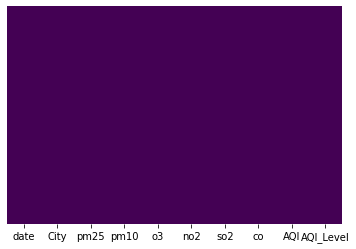

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As per the above graph, we can see that there are no null values found the in the data set.

In [11]:
# date split
data["year"]=data['date'].apply(lambda x:x.split("-")[2])
data["Month"]=data['date'].apply(lambda x:x.split("-")[1])
data["date"]=data['date'].apply(lambda x:x.split("-")[0])

In [12]:
data.head()

,date,City,pm25,pm10,o3,no2,so2,co,AQI,AQI_Level,year,Month
27849,01,Delhi,118,199,20,45,4,15,290,Poor,2014,01
7308,01,Lucknow,118,76,3,10,196,9,290,Poor,2014,01
17851,01,Chennai,118,76,22,13,8,12,290,Poor,2014,01
17810,01,Chennai,118,76,22,13,3,11,290,Poor,2015,01
27829,01,Delhi,118,425,7,66,13,31,394,Very Poor,2015,01


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36825 entries, 27849 to 32818
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       36825 non-null  object
 1   City       36825 non-null  object
 2   pm25       36825 non-null  int64 
 3   pm10       36825 non-null  int64 
 4   o3         36825 non-null  int64 
 5   no2        36825 non-null  int64 
 6   so2        36825 non-null  int64 
 7   co         36825 non-null  int64 
 8   AQI        36825 non-null  int64 
 9   AQI_Level  36825 non-null  object
 10  year       36825 non-null  object
 11  Month      36825 non-null  object
dtypes: int64(7), object(5)
memory usage: 3.7+ MB


In [14]:
data.describe()

,pm25,pm10,o3,no2,so2,co,AQI
count,36825.000000,36825.000000,36825.000000,36825.000000,36825.000000,36825.000000,36825.00000
mean,117.695180,75.630740,21.796877,12.758941,7.965295,8.876144,265.51370
std,62.504895,55.684113,20.616258,12.524249,11.289081,11.420091,106.11069
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.00000
25%,75.000000,45.000000,10.000000,5.000000,3.000000,4.000000,183.00000
50%,117.000000,76.000000,20.000000,10.000000,6.000000,7.000000,290.00000
75%,150.000000,80.000000,25.000000,15.000000,8.000000,10.000000,326.00000
max,999.000000,999.000000,500.000000,500.000000,423.000000,500.000000,3141.00000


<Figure size 1368x360 with 0 Axes>

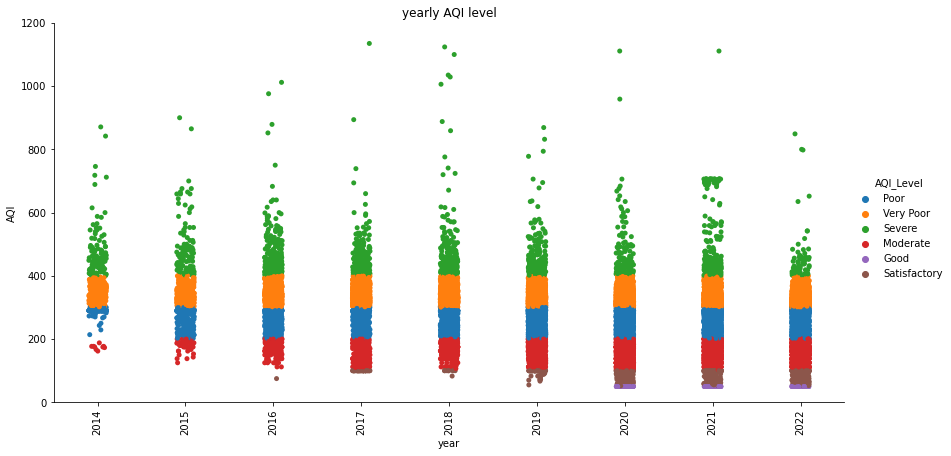

In [15]:
plt.figure(figsize=(19,5))
aqilevel = sns.catplot(x="year",y='AQI', data=data, hue='AQI_Level',height=6, aspect=10/5)
plt.ylim(0,1200)
plt.title('yearly AQI level')
aqilevel.set_xticklabels(rotation=90)

From the above graph,                                     
AQI value is decreasing in recent years as we can see the Good & Satisfactory values occurring from the year 2020. 
Sample values from above 400(indicated in green color) are decreasing by year which indicates better air quality.

In [16]:
from sklearn import preprocessing

In [17]:
lblencode = preprocessing.LabelEncoder()
data['AQI_Level_numeric'] = lblencode.fit_transform(data['AQI_Level'])

In [18]:
data['AQI_Level'].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Good', 'Satisfactory'],
      dtype=object)

In [19]:
data.head()

,date,City,pm25,pm10,o3,no2,so2,co,AQI,AQI_Level,year,Month,AQI_Level_numeric
27849,01,Delhi,118,199,20,45,4,15,290,Poor,2014,01,2
7308,01,Lucknow,118,76,3,10,196,9,290,Poor,2014,01,2
17851,01,Chennai,118,76,22,13,8,12,290,Poor,2014,01,2
17810,01,Chennai,118,76,22,13,3,11,290,Poor,2015,01,2
27829,01,Delhi,118,425,7,66,13,31,394,Very Poor,2015,01,5


In [20]:
data.columns

Index(['date', 'City', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI',
       'AQI_Level', 'year', 'Month', 'AQI_Level_numeric'],
      dtype='object')

In [21]:
data_city_day = data.copy()
data_city_day.columns

Index(['date', 'City', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI',
       'AQI_Level', 'year', 'Month', 'AQI_Level_numeric'],
      dtype='object')

In [22]:
data.corr()

,pm25,pm10,o3,no2,so2,co,AQI,AQI_Level_numeric
pm25,1.000000,0.593812,0.251736,0.392317,0.134317,0.227339,0.748596,0.667293
pm10,0.593812,1.000000,0.212329,0.349601,0.135702,0.230660,0.508603,0.409226
o3,0.251736,0.212329,1.000000,0.240513,0.169827,0.089308,0.215174,0.223699
no2,0.392317,0.349601,0.240513,1.000000,0.212651,0.177458,0.307584,0.300224
so2,0.134317,0.135702,0.169827,0.212651,1.000000,0.082127,0.122326,0.105573
co,0.227339,0.230660,0.089308,0.177458,0.082127,1.000000,0.689697,0.205389
AQI,0.748596,0.508603,0.215174,0.307584,0.122326,0.689697,1.000000,0.678191
AQI_Level_numeric,0.667293,0.409226,0.223699,0.300224,0.105573,0.205389,0.678191,1.000000


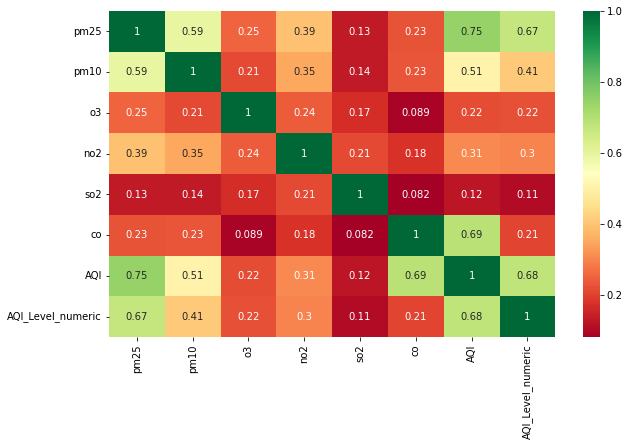

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True);

Box plots are showing correlation between the molecules from the above correlation heatmap.


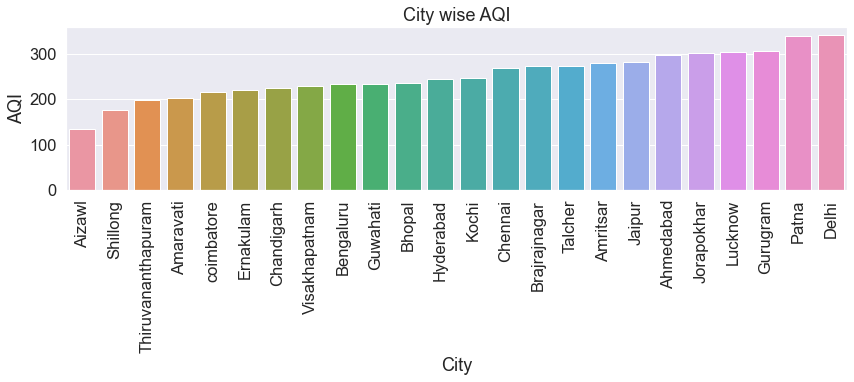

In [24]:
citywise_AQI = data[['City','AQI']].groupby(['City']).mean().sort_values(['AQI']).reset_index()
citywise_AQI.head()
plt.figure(figsize=(14,3))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=citywise_AQI).set(title ='City wise AQI')
plt.xticks(rotation=90)
plt.show()

Delhi is the highest polluted city followed by patna and Gurgram as per the above chart.

In [25]:
x=data['year']
y=data['AQI']

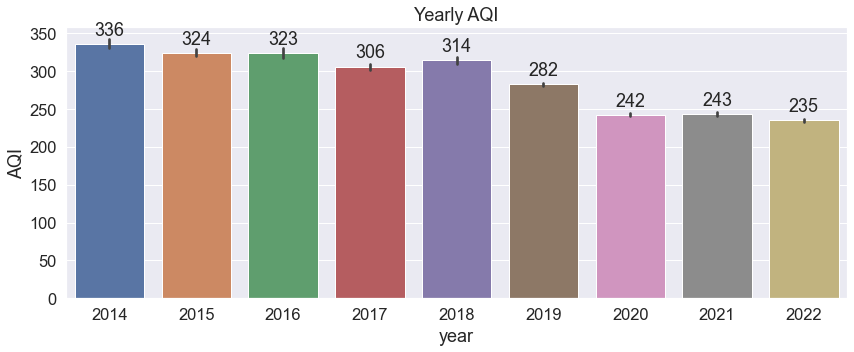

In [26]:
#Yearly AQI Trend
fig, ax = plt.subplots(figsize=(14, 5))
plt.title('Yearly AQI')
barchart=sns.barplot(x = x, y =y, ax=ax)
barchart.bar_label(ax.containers[0],label_type='edge',fmt='%.0f',padding=5)
plt.show()

From the above barchart, we cleary say that the aqi value is higher in the year 2014 foloowed by 2015 etc,and      
Trend indicating that a better aqi from 2020 due to envirornmental changes

In [24]:
pollutants = data.iloc[:,2:8]

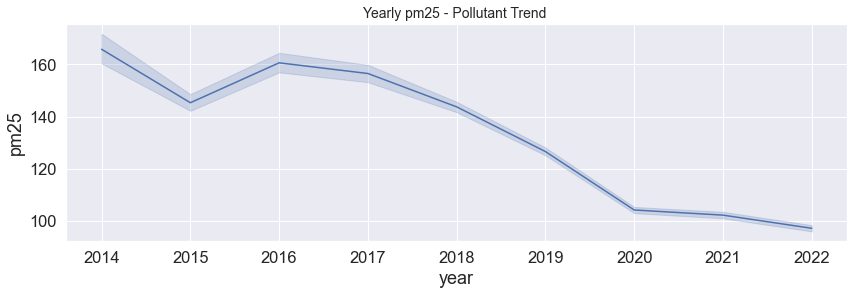

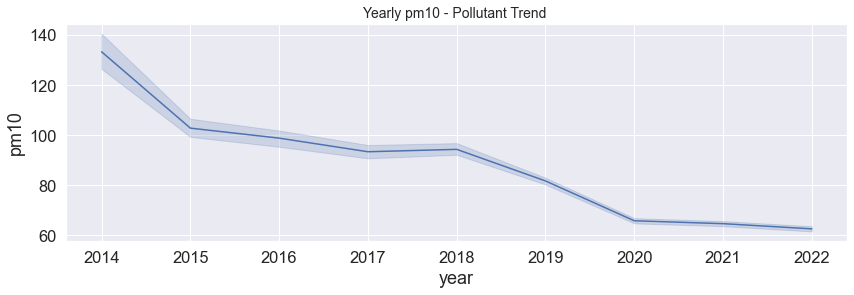

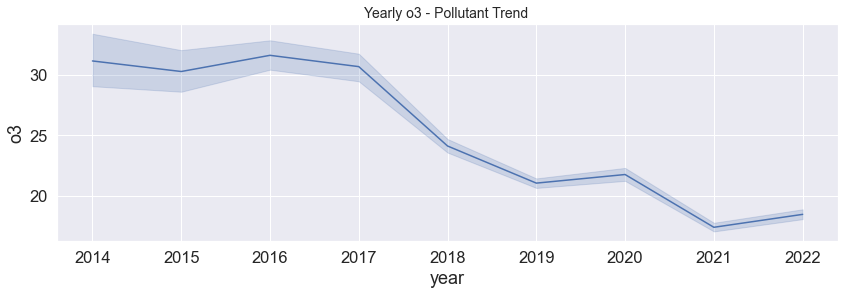

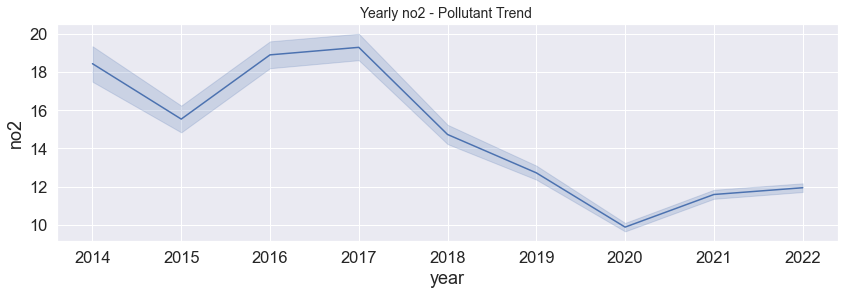

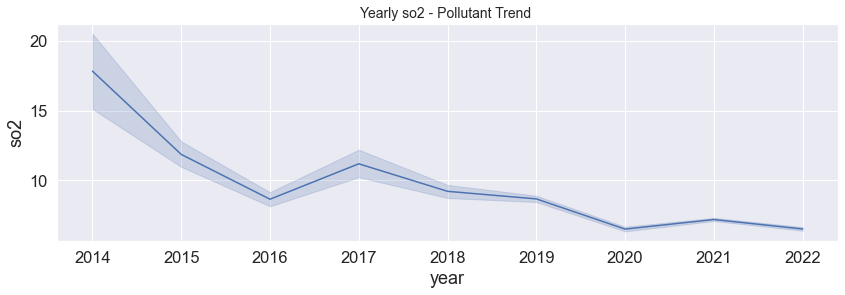

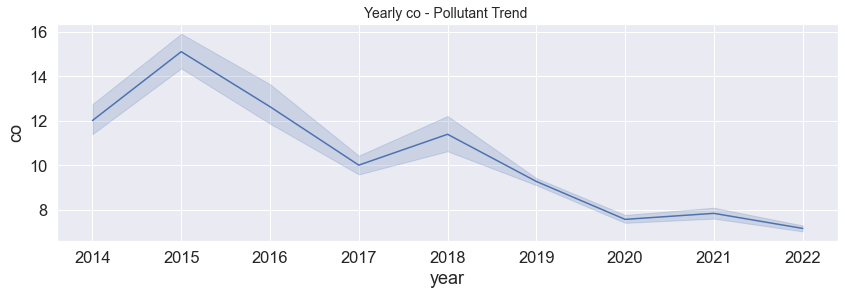

In [25]:
#Yearly Trend of Pollutants.
for pol in pollutants:
    plt.figure(figsize=(14,4))
    sns.lineplot(x='year', y=pol,data=data.sort_values("year"))
    plt.title(f"Yearly {pol} - Pollutant Trend ", fontsize=14)
    plt.show()

# Model Building

In [26]:
X  =  data.loc[:,"pm25":"co"]
X.head()

,pm25,pm10,o3,no2,so2,co
27849,118,199,20,45,4,15
7308,118,76,3,10,196,9
17851,118,76,22,13,8,12
17810,118,76,22,13,3,11
27829,118,425,7,66,13,31


In [27]:
y  =  data.iloc[:,8:9].values

In [28]:
y

array([[290],
       [290],
       [290],
       ...,
       [307],
       [240],
       [100]], dtype=int64)

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25777, 6) (11048, 6) (25777, 1) (11048, 1)


### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [31]:
m1lr = LinearRegression()
m1lr.fit(X_train, y_train)

LinearRegression()

In [32]:
round(m1lr.score(X_train,y_train)*100,2)

85.58

In [33]:
lnrscore = round(m1lr.score(X_test,y_test)*100,2)
print(lnrscore)

82.03


In [34]:
m1lr.predict(X_test)

array([[273.04172763],
       [231.55080885],
       [294.70983715],
       ...,
       [325.13847407],
       [290.48951773],
       [262.92658728]])

#### Cross-Validation

In [35]:
from sklearn.model_selection import cross_val_score
lr_cvscore = cross_val_score(m1lr,X_train,y_train,cv=5)
round(lr_cvscore.mean()*100,2)

85.23

#### Model Evaluation

In [36]:
lnr_prediction = m1lr.predict(X_test)

<AxesSubplot:ylabel='Density'>

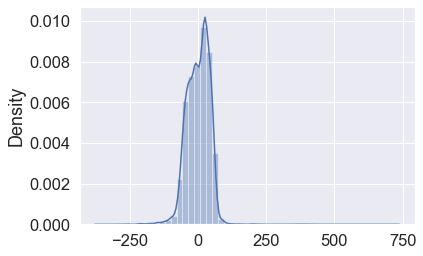

In [37]:
sns.distplot(y_test-lnr_prediction,kde=True)


In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, lnr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, lnr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lnr_prediction)))

MAE: 32.8607207184706
MSE: 1703.3024781819738
RMSE: 41.27108525568444


### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtr = DecisionTreeRegressor(criterion='mse')

In [42]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse')

In [43]:
round(dtr.score(X_train,y_train)*100,2)

100.0

In [44]:
dtrscore = round(dtr.score(X_test,y_test)*100,2)
dtrscore

99.17

#### Cross Validation

In [45]:
dt_cvscore = cross_val_score(dtr,X_train,y_train,cv=5)
round(dt_cvscore.mean()*100,2)

97.8

#### Model Evaluation

In [46]:
dt_prediction=dtr.predict(X_test)
dt_prediction

array([324., 183., 325., ..., 351., 330., 310.])

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_prediction))
print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_prediction)))

MAE: 0.667793782973001
MSE: 78.76066265572122
RMSE: 8.874720426904794


## Xgboost Regressor

In [48]:
#pip install xgboost

In [49]:
import xgboost as xgb

In [50]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
round(xgbr.score(X_train, y_train)*100,2)

99.99

In [52]:
xgbscore =round(xgbr.score(X_test, y_test)*100,2)
xgbscore

99.8

In [53]:
round(xgbr.score(X, y)*100,2)

99.94

In [54]:
#Cross Validation
xb_cvscore=cross_val_score(xgbr,X_train,y_train,cv=5)
round(xb_cvscore.mean()*100,2)

98.34

In [55]:
xgbr_prediction=xgbr.predict(X_test)

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, xgbr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, xgbr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgbr_prediction)))

MAE: 1.0988884845736404
MSE: 19.400733062550646
RMSE: 4.404626324962272


### KNN Regressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knr_regressor=KNeighborsRegressor(n_neighbors=2)
knr_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [59]:
round(knr_regressor.score(X_train,y_train)*100,2)

99.44

In [60]:
knnscore=round(knr_regressor.score(X_test,y_test)*100,2)
knnscore

97.29

In [61]:
round(knr_regressor.score(X,y)*100,2)

98.9

In [62]:
#cross validation
score = cross_val_score(knr_regressor,X_train,y_train,cv=5)
round(score.mean()*100,2)

97.43

In [63]:
#Model Evaluation

knr_prediction=knr_regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, knr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, knr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knr_prediction)))

MAE: 7.174420709630702
MSE: 257.2864771904417
RMSE: 16.040152031400503


### Support Vector Machine

In [64]:
from sklearn.svm import SVR

In [65]:
svmr = SVR()
svmr.fit(X_train,y_train)

SVR()

In [66]:
round(svmr.score(X_train,y_train)*100,2)

65.14

In [67]:
svmscore=round(svmr.score(X_test,y_test)*100,2)
svmscore

78.41

In [68]:
round(svmr.score(X,y)*100,2)

68.5

In [69]:
#cross validation
svm_score = cross_val_score(svmr,X_train,y_train,cv=5)
round(svm_score.mean()*100,2)

65.25

In [70]:
#Model Evaluation

svm_prediction=svmr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, svm_prediction))
print('MSE:', metrics.mean_squared_error(y_test, svm_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_prediction)))

MAE: 18.729786527198446
MSE: 2046.095081454118
RMSE: 45.233782524282866


### Best Accuracy Model

In [71]:
import pandas as pd
accuracy_data = pd.DataFrame.from_dict({'Model name': ['Linear Regression','Decision Tree','XGBoost','KNN','SVM'],
       'Accuracy': [lnrscore,dtrscore,xgbscore,knnscore,svmscore]})


In [72]:
print(accuracy_data)

          Model name  Accuracy
0  Linear Regression     82.03
1      Decision Tree     99.17
2            XGBoost     99.80
3                KNN     97.29
4                SVM     78.41


[Text(0, 0, '99.8'),
 Text(0, 0, '99.17'),
 Text(0, 0, '97.29'),
 Text(0, 0, '82.03'),
 Text(0, 0, '78.41')]

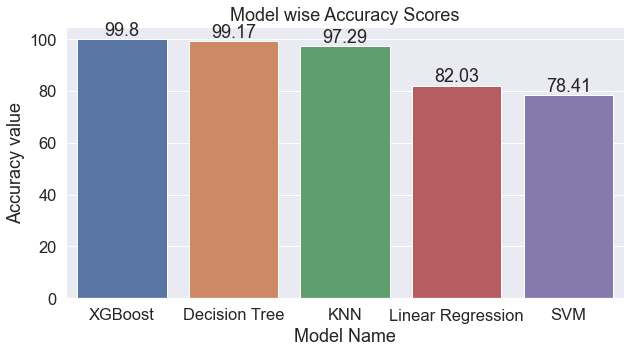

In [73]:
import seaborn as sns
Model_name=['Linear Regression','Decision Tree','XGBoost','KNN','SVM']
x=Model_name
y=[lnrscore,dtrscore,xgbscore,knnscore,svmscore]
df= pd.DataFrame({"Model_name":Model_name,"y":y})
fig, ax = plt.subplots(figsize=(10, 5))
barchart = sns.barplot(x=x, y=y, ax=ax,data=df,order=df.sort_values('y',ascending=False).Model_name )
plt.xlabel('Model Name')
plt.ylabel('Accuracy value')
plt.title('Model wise Accuracy Scores')
barchart.bar_label(ax.containers[0], label_type='edge')

##### XGBoost Algorithm is the best accuracy model when comparing with other regression models

### AQI Forecasting Using Prophet

In [27]:
data_f = pd.read_csv('AQI_Data.csv',skipinitialspace = True)
data_f = pd.DataFrame(data_f)
data_f = data_f.sort_values('date')
data_f.head()

,date,City,pm25,pm10,o3,no2,so2,co,AQI,AQI_Level
27849,01-01-2014,Delhi,118,199,20,45,4,15,290,Poor
7308,01-01-2014,Lucknow,118,76,3,10,196,9,290,Poor
17851,01-01-2014,Chennai,118,76,22,13,8,12,290,Poor
17810,01-01-2015,Chennai,118,76,22,13,3,11,290,Poor
27829,01-01-2015,Delhi,118,425,7,66,13,31,394,Very Poor


In [28]:
data_f['date'] = pd.to_datetime(data_f['date'], errors = 'coerce')

In [29]:
data_f = data_f.groupby('date')['AQI'].sum().reset_index()

In [30]:
data_f.head()

,date,AQI
0,2014-01-01,870
1,2014-01-02,1025
2,2014-01-03,304
3,2014-01-04,642
4,2014-01-05,381


In [31]:
data_f = data_f.set_index('date')
data_f.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2022-11-09', '2022-12-01', '2022-12-02', '2022-12-03',
               '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09'],
              dtype='datetime64[ns]', name='date', length=3173, freq=None)

In [32]:
data_f.head()

,AQI
date,
2014-01-01,870
2014-01-02,1025
2014-01-03,304
2014-01-04,642
2014-01-05,381


In [33]:
y = data_f['AQI'].resample('MS').mean()

In [34]:
y

date
2014-01-01     763.903226
2014-02-01     740.821429
2014-03-01     515.903226
2014-04-01     628.133333
2014-05-01     514.548387
                 ...     
2022-08-01    4854.178571
2022-09-01    4554.833333
2022-10-01    5235.444444
2022-11-01    5117.222222
2022-12-01    5175.888889
Freq: MS, Name: AQI, Length: 108, dtype: float64

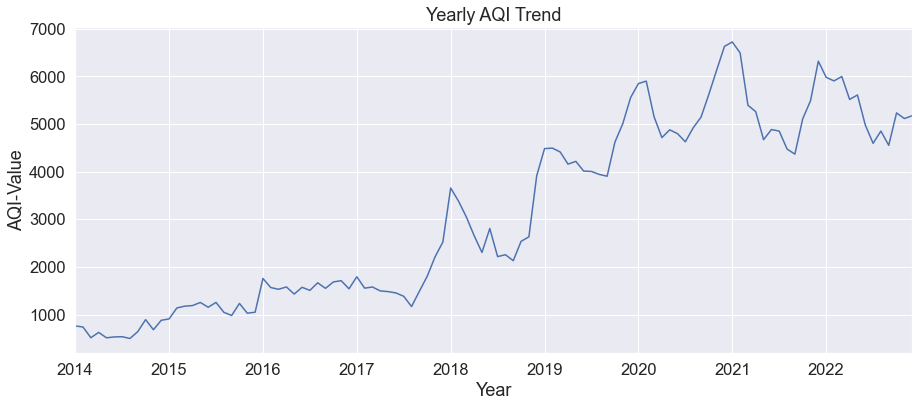

In [35]:
y.plot(figsize=(15, 6))
plt.title('Yearly AQI Trend')
plt.xlabel('Year')
plt.ylabel('AQI-Value')
plt.show()

According to the above graph, the annual aqi mean trend decreased from 2014 to 2017 and increased from 2018. In 2021, we can observe that the greater aqi mean.

In [36]:
data_f = data_f.reset_index()

In [37]:
from prophet import Prophet

In [38]:
data_f = data_f.rename(columns={'date': 'ds', 'AQI': 'y'})
data_f_model = Prophet(interval_width=0.95)

In [39]:
data_f

,ds,y
0,2014-01-01,870
1,2014-01-02,1025
2,2014-01-03,304
3,2014-01-04,642
4,2014-01-05,381
...,...,...
3168,2022-12-05,5263
3169,2022-12-06,5004
3170,2022-12-07,4540
3171,2022-12-08,3602


In [40]:
data_f_model.fit(data_f)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [41]:
AQI_forecast = data_f_model.make_future_dataframe(periods=48, freq='MS')
AQI_forecast = data_f_model.predict(AQI_forecast)

<Figure size 1296x432 with 0 Axes>

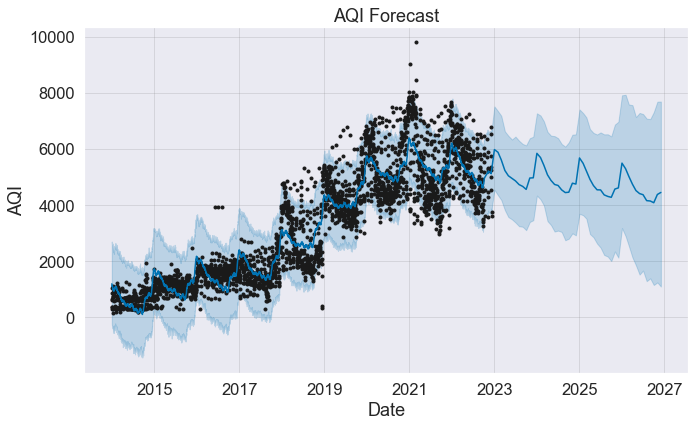

In [42]:
plt.figure(figsize=(18, 6))
data_f_model.plot(AQI_forecast, xlabel = 'Date', ylabel = 'AQI')
plt.title('AQI Forecast');

From the above graph we can see the yearly aqi forecasting trend line up to 2026.

In [90]:
# save the model to disk
filename = 'AQI_forecasting_model.sav'
pickle.dump(data_f_model, open(filename, 'wb'))

In [91]:
# save the model to disk
filename = 'AQI_Prediction_model.sav'
pickle.dump(xgbr, open(filename, 'wb'))